In [20]:
import copy
import sys
sys.path.insert(0, "..")
import numpy as np
import matplotlib.pyplot as plt
from classes.regression.regressers import pol_kernel_regressor, RBF_kernel_regressor

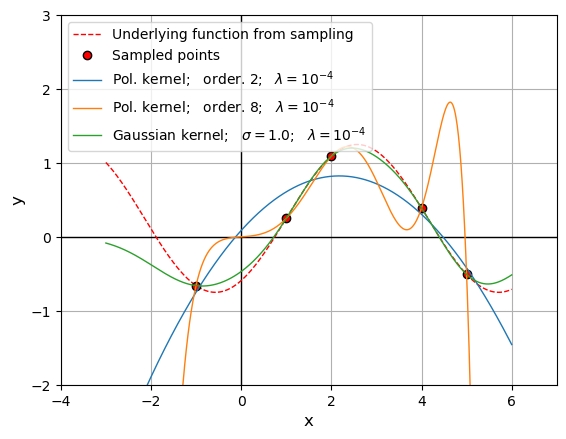

In [21]:
fig, ax = plt.subplots()
ax.grid()
ax.set_xlabel(r"x", fontsize=12)
ax.set_ylabel(r"y", fontsize=12)
ax.set_xlim([-4,7])
ax.set_ylim([-2,3])
ax.axhline(0, c="k", lw=1)
ax.axvline(0, c="k", lw=1)

def sine_func(xs):
    return np.sin(xs - 1) +1.0/4.0

xs = np.linspace(-3,6, 1000)
x_tab = np.array([-1,1,2,4,5])
data = np.zeros(shape=(len(x_tab), 2))
data[:,0] = x_tab
data[:,1] = sine_func(x_tab)
ax.plot(xs, sine_func(xs), c='r', label="Underlying function from sampling", lw=1, ls="--")
ax.plot(data[:,0], data[:,1], 'o', c="r", label="Sampled points", markeredgecolor="k")
#pol_kernel_func(x_basis=data[:,0], x_data=data[:,0], N_deg=1)
degs = [2, 8]
for deg in degs:
    ker_reg = pol_kernel_regressor(x_data=data[:,0], y_data=data[:,1], N_deg=deg, lamb=1e-4)
    y_preds = ker_reg.sample(x_data=xs)
    ax.plot(xs, y_preds, lw=1, label=rf"Pol. kernel;   order. {deg};   "+r"$\lambda=10^{-4}$")

ker_reg = RBF_kernel_regressor(x_data=data[:,0], y_data=data[:,1], lamb=1e-4, sigma=1.0)
y_preds = ker_reg.sample(x_data=xs)
ax.plot(xs, y_preds, lw=1, label=rf"Gaussian kernel;   $\sigma={1.0}$;   "+r"$\lambda=10^{-4}$")
ax.legend()